## Objective
Predicion of milage (mpg) of a vehicle based on the input data using the MPG.csv dataset using linear regressin algorithm

## Import Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

## Import Data

In [5]:
df = pd.read_csv("MPG.csv")

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


## Remove Missing Values

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## Data Visualization

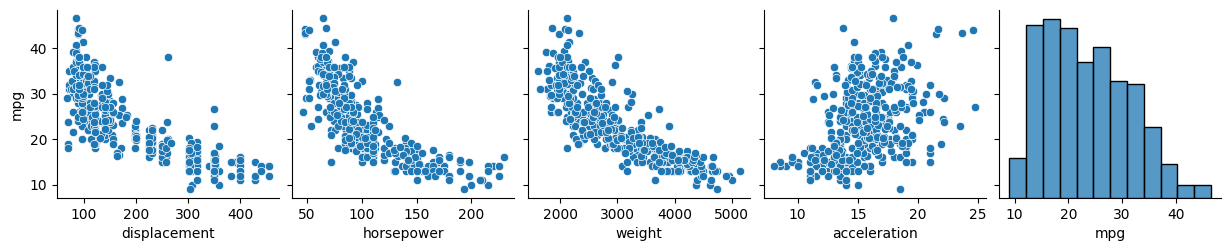

In [16]:
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

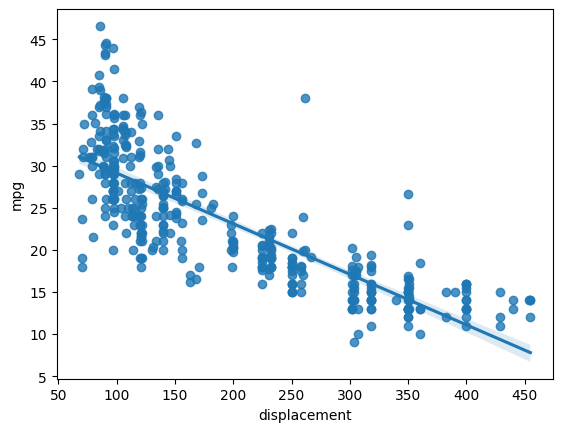

In [17]:
sns.regplot(x= 'displacement',y= 'mpg',data= df);

## Define Target Variable y and Feature x

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [19]:
y= df['mpg']

In [20]:
y.shape

(392,)

In [21]:
x= df[['displacement','horsepower','weight','acceleration']]

In [22]:
x.shape

(392, 4)

In [23]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


## Standard Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss=StandardScaler()

In [29]:
x=ss.fit_transform(x)

In [30]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [31]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## Train Test Split Dataset

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=40)

## Train Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.intercept_

23.439003559508567

In [37]:
lr.coef_

array([-0.69968827, -1.12649597, -4.80825423,  0.09628029])

In [38]:
y_pred=lr.predict(x_test)

## Model Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [40]:
mean_absolute_error(y_test,y_pred)

2.95453514952612

In [41]:
r2_score(y_test,y_pred)

0.7410438478964747

In [43]:
mean_absolute_percentage_error(y_test,y_pred)

0.1323980557785589

## Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [48]:
x_train,x_test=poly.fit_transform(x_train),poly.fit_transform(x_test)

## Retrain model

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=lr.predict(x_test)

In [52]:
y_pred

array([29.34260246, 25.55332783, 18.83217441, 19.60539308, 24.48131743,
       27.74860899, 31.83826489, 15.83382746, 14.96740223, 22.08067819,
       25.11243504,  9.7680249 , 33.54131626, 18.96326214, 25.45932116,
       31.60720526, 16.9007316 , 25.5630049 , 29.23961536, 12.89895371,
       13.68600339, 32.05499526, 13.90793357, 13.49469355, 29.19046463,
       16.10352596, 15.08723179, 23.76809852, 14.33569398, 31.57250917,
       29.77657206, 13.8897868 , 24.42738284, 14.11561344, 15.48272322,
       23.20159915, 25.71557292, 31.19760295, 21.72191741, 28.25874315,
       30.9035161 , 16.23563291, 22.67823119, 25.64880825, 30.63606299,
       17.77677333, 15.73391772, 31.07179595, 23.92233583, 20.7413402 ,
       17.69298084, 27.04187059, 24.77830612, 26.58648484, 25.07413797,
       18.54668492, 28.55986156, 32.69866724, 14.34880772, 24.56139704,
       19.55988296, 16.75238616, 13.60303575, 19.32010729, 15.48272322,
       14.58565723, 25.84823571, 32.49013062, 13.54965531, 24.69

In [53]:
lr.intercept_

21.04660495570085

In [54]:
lr.coef_

array([-2.84665408, -4.71970203, -1.50840577, -0.95959369,  1.72228293,
        0.90824305,  0.10076085, -0.1101189 , -0.74414781,  0.92550262])

## Model Evaluation

In [56]:
mean_absolute_error(y_test,y_pred)

2.5003818754103286

In [57]:
mean_absolute_percentage_error(y_test,y_pred)

0.10728276775101644

In [58]:
r2_score(y_test,y_pred)

0.7882051453295136